# Homework
## Mini Batch Training
In AI, datasets are often very large and cannot be processed all at once as is done in the loop above. The data is instead randomly sampled in smaller _batches_ where each _batch_ contains `batch_size` inputs. How can you change the loop above to sample the dataset in smaller batches? Hint: Our `data` variable is a Pandas `DataFrame` object, search for "how to sample a DataFrame".

Instead of using the entire dataset like
```python
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
```
Use
```python
data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
```

You also have to adjust the loop_N accordingly to make sure that it loop over the entire datasets the same number of times.
```python
loop_N = 30*len(data)//batch_size
```

Please plot your learning curve for different batch size, such as 32, 64, 128, 256, 512.

## Learning rate issue (Bonus)
As described above, if the learning rate is too large, it will affect the convergence. Do your training with (batch_size = 64, learning_rate_m = 1e-7, learning_rate_b = 1e-1). Then linearly increase the batch size and learning rate until you see the training does not converge.
```
(64, 1e-7, 1e-1)*1
(64, 1e-7, 1e-1)*2
(64, 1e-7, 1e-1)*4
(64, 1e-7, 1e-1)*8
...
```

**How to submit your homework**
* Fork the github repo to your personal github
* Make change to the 01_linear_regression_sgd.ipynb, and then push to your personal github
* Provide the link of 01_linear_regression_sgd in the personal github.

Follow the below instruction on how to do this:
https://github.com/argonne-lcf/ai-science-training-series/blob/main/00_introToAlcf/03_githubHomework.md

# Answer


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [2]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

--2024-10-06 15:53:04--  https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8804 (8.6K) [text/plain]
Saving to: ‘slimmed_realestate_data.csv’

slimmed_realestate_ 100%[===================>]   8.60K  --.-KB/s    in 0s      

2024-10-06 15:53:04 (74.0 MB/s) - ‘slimmed_realestate_data.csv’ saved [8804/8804]

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


In [3]:
n = len(data)

x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

denominator = n * sum_x2 - sum_x * sum_x

m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


In [4]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

In [5]:
def model(x,m,b):
   return m * x + b

In [6]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [7]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

# Answer

In [46]:
df = pd.DataFrame({'N': range(1, 31)})

In [50]:
# set our initial slope and intercept
m = 5.
b = 1000.
batch_size = 32 #32 64 128 256 512

# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1

# use these to plot our progress over time
loss_history = []

baches = len(data)//batch_size
loop_N = 30

for i in range(loop_N):
  # print(i,m,b)
  for j in range(baches):
    data_batch = data.sample(batch_size)
    data_x = data_batch['GrLivArea'].to_numpy()
    data_y = data_batch['SalePrice'].to_numpy()

    # update our slope and intercept based on the current values
    m = updated_m(data_x,data_y,m,b,learning_rate_m)
    b = updated_b(data_x,data_y,m,b,learning_rate_b)
    # print(j,m,b)

  # calculate the loss value
  # loss_value = np.mean(loss(data_x,data_y,m,b))
  loss_value = np.mean(loss(x,y,m,b))

  # keep a history of our loss values
  loss_history.append(loss_value)

  # print our progress
  print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))

  df['loss_32'] = loss_history

[000]  dy_i = 86.02 * x + 34528.91     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1485171235.904283
[001]  dy_i = 84.26 * x + 37329.13     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1486055555.435745
[002]  dy_i = 85.87 * x + 37764.20     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1478893549.633976
[003]  dy_i = 84.33 * x + 37721.67     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1484008155.624460
[004]  dy_i = 83.07 * x + 38936.98     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1489043443.793375
[005]  dy_i = 85.46 * x + 39319.52     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1481182552.511982
[006]  dy_i = 85.48 * x + 36961.70     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1479922012.539293
[007]  dy_i = 82.06 * x + 37214.69     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1516334605.320204
[008]  dy_i = 87.48 * x + 37629.40     previously calculated: y_i = 87.6

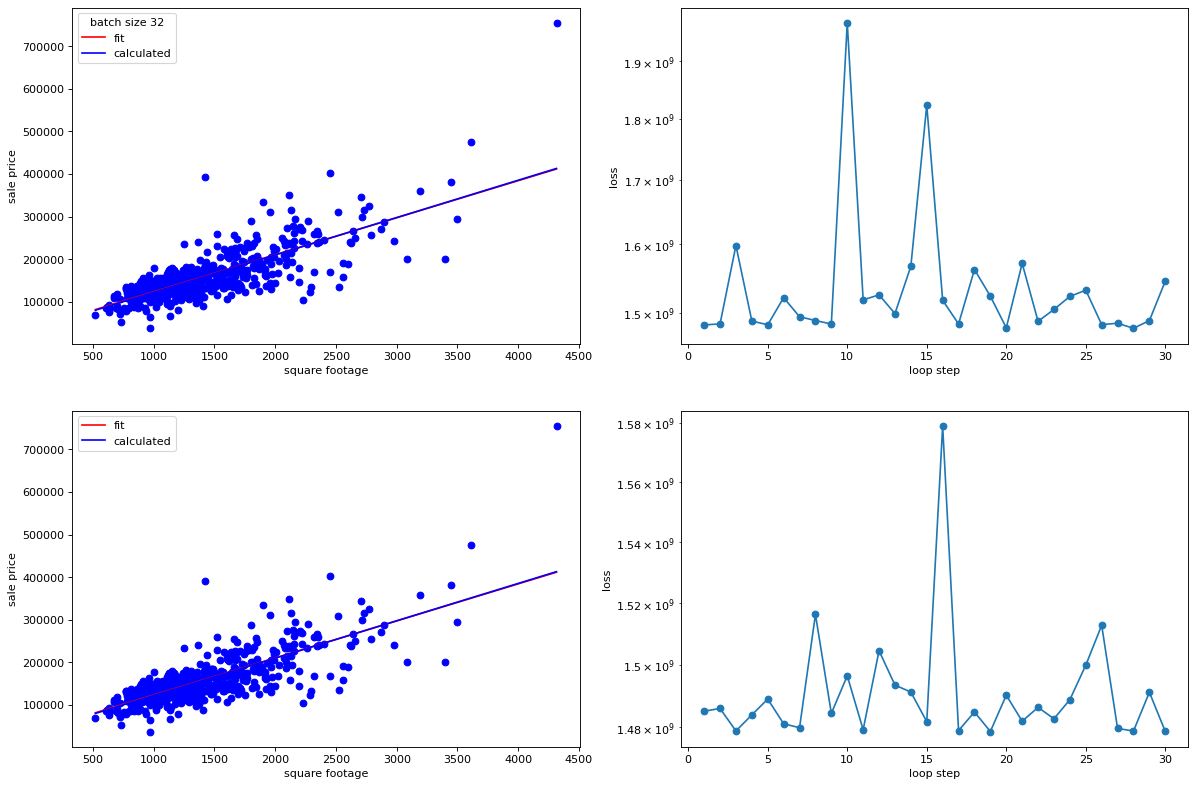

In [55]:
fig,ax = plt.subplots(2,2,figsize=(18,12),dpi=80)
line_x = np.arange(x.min(),x.max()) # here we also plot the calculated linear fit for comparison
line_y = line_x * m_calc + b_calc

# Plot fit for 32
plot_data(x,y,m,b,ax[0,0])
ax[0,0].plot(line_x,line_y,'b-',label='calculated')
ax[0,0].legend(title='batch size 32')
ax[0,0].set_xlabel('square footage')
ax[0,0].set_ylabel('sale price')

# plot the loss for 32
ax[0,1].plot(df['N'],df['loss_32'], 'o-')
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel('loop step')
ax[0,1].set_ylabel('loss')

# Plot fit for 64
plot_data(x,y,m,b,ax[1,0])
ax[1,0].plot(line_x,line_y,'b-',label='calculated')
ax[1,0].legend(title='batch size 64')
ax[1,0].set_xlabel('square footage')
ax[1,0].set_ylabel('sale price')

# plot the loss for 64
ax[1,1].plot(df['N'],df['loss_64'], 'o-')
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel('loop step')
ax[1,1].set_ylabel('loss')
plt.show()
